In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.n_jobs = 8
sc.set_figure_params(dpi=100, dpi_save=600, frameon=False, figsize=(5,5))
mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"
%config InlineBackend.figure_format = 'retina'

python(79438) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [2]:
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

python(79444) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(79446) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_91387/2133713794.py:2: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [3]:
%%R -o adata
adata <- readRDS('/Users/pax/RNAse4/data/SGN.RDS')

In [4]:
adata.layers['counts'] = adata.X.copy()

In [5]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

/Users/pax/miniconda3/envs/rnase4/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:916: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


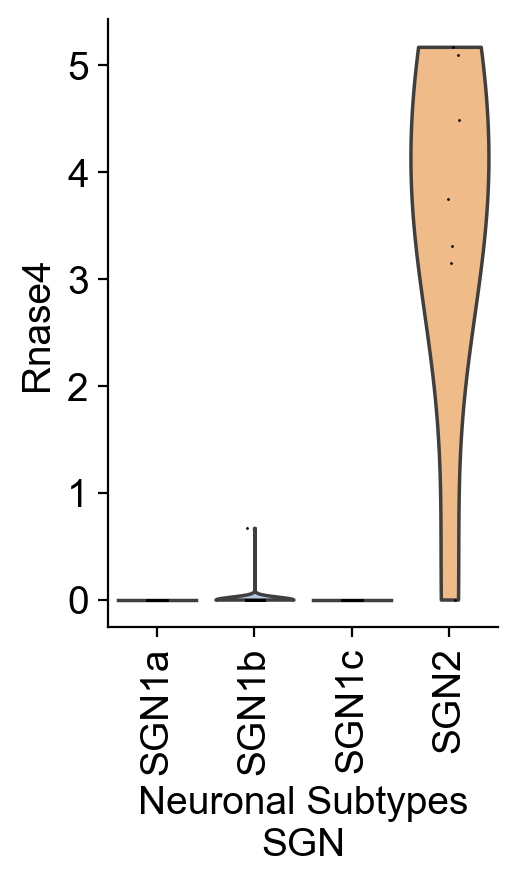

In [8]:
fig, ax = plt.subplots(figsize=(2.5,4))
sc.pl.violin(adata, keys=['Rnase4'], groupby='ident', ax=ax, show=False, use_raw=False, palette='tab20')
ax.grid(False)
ax.set_xlabel('Neuronal Subtypes\nSGN')
ax.xaxis.set_tick_params(rotation=90)
for s in ['top','right']:
    ax.spines[s].set_visible(False)
fig.savefig('./figures/01_Rnase4_vln_sgn_new_param.pdf', bbox_inches='tight', dpi=300)